## Download the enron dataset

In [ ]:
# print("Downloading the Enron dataset")

# import requests
# url = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz"
# filename = "../enron_mail_20150507.tar.gz"
# with open(filename, "wb") as f:
#     r = requests.get(url)
#     f.write(r.content)
# print("Download Complete!")

# print("Unzipping Enron dataset (This may take a while)")
# import tarfile
# tfile = tarfile.open("../enron_mail_20150507.tar.gz")
# tfile.extractall("..")
# tfile.close()

# print("You're ready to go!")

# Data Preprocessing and Cleaning

#### Parsing Enron Emails’ Folders and Writing to CSV

In [2]:
import os
import csv
from email.parser import Parser

In [13]:
# Define the root directory of the Enron dataset
MAILDIR_PATH = "../maildir" 
OUTPUT_CSV = "../enron_emails.csv"

In [14]:
# Define the CSV columns
fields = ["file", "message"]

In [15]:
# Function to extract email content from a file
def extract_email(file_path):
    with open(file_path, "r", encoding="latin1") as file:
        data = file.read()
    relative_path = os.path.relpath(file_path, MAILDIR_PATH).replace(MAILDIR_PATH + '/', '')
    email_message = Parser().parsestr(data)
    return {
        "file": relative_path,
        "message": email_message.as_string()
    }

# List to store the email data
all_emails = []

# Walk through the directories and extract emails
for root, dirs, files in os.walk(MAILDIR_PATH):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            email_content = extract_email(file_path)
            all_emails.append(email_content)
        except Exception as e:
            print(f"Failed to extract {file_path}: {e}")

# Write the emails to a CSV file
with open(OUTPUT_CSV, "w", newline="", encoding="utf-8") as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fields)
    csv_writer.writeheader()
    csv_writer.writerows(all_emails)

### Loading Parsed Enron Emails’ CSV File

In [16]:
import pandas as pd

In [17]:
# Load the dataset
df = pd.read_csv(r"../enron_emails.csv")

In [18]:
# Display the first few rows
df.head()

,file,message
0,allen-p\all_documents\1,Message-ID: <29790972.1075855665306.JavaMail.e...
1,allen-p\all_documents\10,Message-ID: <21975671.1075855665520.JavaMail.e...
2,allen-p\all_documents\100,Message-ID: <7452188.1075855667684.JavaMail.ev...
3,allen-p\all_documents\101,Message-ID: <23790115.1075855667708.JavaMail.e...
4,allen-p\all_documents\102,Message-ID: <5860470.1075855667730.JavaMail.ev...


In [19]:
# Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import email
import re

### Explore the Structure of emails in dataset

In [21]:
for message in df['message'][:1]:
    # Converts the raw email string into an email.message.Message object.
    e = email.message_from_string(message)
    print(e)

Message-ID: <29790972.1075855665306.JavaMail.evans@thyme>
Date: Wed, 13 Dec 2000 18:41:00 -0800 (PST)
From: 1.11913372.-2@multexinvestornetwork.com
To: pallen@enron.com
Subject: December 14, 2000 - Bear Stearns' predictions for telecom in Latin
 America
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Multex Investor <1.11913372.-2@multexinvestornetwork.com>
X-To: <pallen@enron.com>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\All documents
X-Origin: Allen-P
X-FileName: pallen.nsf

In today's Daily Update you'll find free reports on
America Online (AOL), Divine Interventures (DVIN),
and 3M (MMM); reports on the broadband space, Latin
American telecom, and more.

For free research, editor's picks, and more come to the Daily Investor:
http://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&d=20001214#
investor

***************************************************************
You are receiving this mail because

In [22]:
type(e)

email.message.Message

e.items(): This method returns the email's headers as key-value pairs (e.g., From, To, Subject, etc.).

In [23]:
e.items()

[('Message-ID', '<29790972.1075855665306.JavaMail.evans@thyme>'),
 ('Date', 'Wed, 13 Dec 2000 18:41:00 -0800 (PST)'),
 ('From', '1.11913372.-2@multexinvestornetwork.com'),
 ('To', 'pallen@enron.com'),
 ('Subject',
  "December 14, 2000 - Bear Stearns' predictions for telecom in Latin\n America"),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>'),
 ('X-To', '<pallen@enron.com>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\Phillip_Allen_Dec2000\\Notes Folders\\All documents'),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen.nsf')]

In [24]:
# Display the keys of the email object
print(e.keys())

['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']


In [25]:
# Display the values of the email object
print(e.values())

['<29790972.1075855665306.JavaMail.evans@thyme>', 'Wed, 13 Dec 2000 18:41:00 -0800 (PST)', '1.11913372.-2@multexinvestornetwork.com', 'pallen@enron.com', "December 14, 2000 - Bear Stearns' predictions for telecom in Latin\n America", '1.0', 'text/plain; charset=us-ascii', '7bit', 'Multex Investor <1.11913372.-2@multexinvestornetwork.com>', '<pallen@enron.com>', '', '', '\\Phillip_Allen_Dec2000\\Notes Folders\\All documents', 'Allen-P', 'pallen.nsf']


In [26]:
# show message body
e.get_payload()

'In today\'s Daily Update you\'ll find free reports on\nAmerica Online (AOL), Divine Interventures (DVIN),\nand 3M (MMM); reports on the broadband space, Latin\nAmerican telecom, and more.\n\nFor free research, editor\'s picks, and more come to the Daily Investor:\nhttp://www.multexinvestor.com/AF004627/magazinecover.asp?promo=unl&d=20001214#\ninvestor\n\n***************************************************************\nYou are receiving this mail because you have registered for\nMultex Investor. To unsubscribe, see bottom of this message.\n***************************************************************\n\n======================== Sponsored by =========================\nWould you own just the energy stocks in the S&P 500?\nSelect Sector SPDRs divides the S&P 500 into nine sector index funds.\nPick and choose just the pieces of the S&P 500 you like best.\nhttp://www.spdrindex.com\n===============================================================\n\nFeatured in today\'s edition of the Daily

### Data Preprocessing and Cleaning

#### Extract headers

In [27]:
# Extract specific fields from a collection of email messages
def extractmailitems(field, msg):
    elst = []  # Initialize an empty list to store the extracted fields
    
    for i, message in (msg.items()):  # Loop over the items in the 'msg' series
        e = email.message_from_string(message)  # Convert the message string into an email message object by using Python's email module
        elst.append(e.get(field))  # Extract the specified 'field' (like 'From', 'To', 'Subject') and append it to the list
       
    return elst  # Return the list of extracted fields

In [28]:
# Define the columns to extract, based on the email headers which we are interested in
columns = ['Date', 'From', 'To', 'Subject', 'X-From', 'X-To', 'X-Folder', 'X-Origin', 'X-Filename']
# Create a new column in the dataframe for each of the columns in the list above and extract the information to store the new column
for i in columns:
    df[i] = extractmailitems(i, df['message'])

In [29]:
# Display 5 random samples of the DataFrame
df.sample(5)

,file,message,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename
192465,jones-t\notes_inbox\3906,Message-ID: <21353881.1075847424232.JavaMail.e...,"Sun, 1 Apr 2001 18:57:00 -0700 (PDT)",enron.announcements@enron.com,all.worldwide@enron.com,eThink About It: 4/2/01,Enron Announcements,All Enron Worldwide,\Tanya_Jones_June2001\Notes Folders\Notes inbox,JONES-T,tjones.nsf
176611,hyvl-d\all_documents\309,Message-ID: <20206617.1075842218850.JavaMail.e...,"Thu, 7 Sep 2000 02:24:00 -0700 (PDT)",joseph.deffner@enron.com,dan.hyvl@enron.com,Re: Monetized Contracts,Joseph Deffner,Dan J Hyvl,\Dan_Hyvl_Dec2000_June2001\Notes Folders\All d...,HYVL-D,dhyvl.nsf
320062,mann-k\_sent_mail\2372,Message-ID: <17039427.1075846086948.JavaMail.e...,"Fri, 15 Dec 2000 02:20:00 -0800 (PST)",kay.mann@enron.com,john.schwartzenburg@enron.com,"Re: westinghouse 501D5A gtg, with damaged gene...",Kay Mann,John Schwartzenburg,\Kay_Mann_June2001_4\Notes Folders\'sent mail,MANN-K,kmann.nsf
286968,lokay-m\deleted_items\344,Message-ID: <5126514.1075862059726.JavaMail.ev...,"Fri, 16 Nov 2001 10:07:21 -0800 (PST)",michelle.lokay@enron.com,"steven.harris@enron.com, kimberly.watson@enron...",California Capacity Report for Week of 11/12-1...,"Lokay, Michelle </O=ENRON/OU=NA/CN=RECIPIENTS/...","Harris, Steven </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\MLOKAY (Non-Privileged)\Lokay, Michelle\Delet...",Lokay-M,MLOKAY (Non-Privileged).pst
234925,kean-s\archiving\untitled\5803,Message-ID: <28056745.1075847779243.JavaMail.e...,"Wed, 21 Feb 2001 05:03:00 -0800 (PST)",bernadette.hawkins@enron.com,"steven.kean@enron.com, richard.shapiro@enron.c...",Scope of FERC Jurisdiction Over State-Owned Ut...,Bernadette Hawkins,"Steven J Kean, Richard Shapiro, Linda Robertso...",\Steven_Kean_June2001_2\Notes Folders\Archivin...,KEAN-S,skean.nsf


#### Extract Message Main Content

The function `content` extracts the body (payload) from each email in the `df['message']` column and creates a new column, `Content`, to store this content in the DataFrame.

`col`: This is the column of email messages from a DataFrame, which contains the raw email strings (i.e., the message column of your DataFrame).

In [30]:
# Extract the email body
def content(col):
    contentcolumn = []  # Initialize an empty list to store the body content of emails
    
    for message in col.values:  # Loop through each message in the 'col' column of the DataFrame
        e = email.message_from_string(message)  # Convert the raw email string into an email.message.Message object
        contentcolumn.append(e.get_payload())  # Extract the email body (payload) and append it to the list
    
    return contentcolumn  # Return the list of email bodies
# Extract the email main content and store it in a new column 'Body'
df['Content'] = content(df['message'])

In [31]:
# Display 5 random samples of the DataFrame
df.sample(5)

,file,message,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Content
349197,nemec-g\inbox\1683,Message-ID: <10874667.1075861358942.JavaMail.e...,"Thu, 8 Nov 2001 14:49:12 -0800 (PST)",notifications.isc@enron.com,users.dl-enron@enron.com,Updated - Cancellation of System Outage Notifi...,ISC System Notifications </O=ENRON/OU=NA/CN=RE...,DL-Enron Production SAP Users </O=ENRON/OU=NA/...,"\GNEMEC (Non-Privileged)\Nemec, Gerald\Inbox",Nemec-G,GNEMEC (Non-Privileged).pst,UPDATE\n\nCancellation of System Outage Notifi...
378628,rogers-b\discussion_threads\481,Message-ID: <31734624.1075857190338.JavaMail.e...,"Tue, 4 Apr 2000 07:34:00 -0700 (PDT)",yvan.chaxel@enron.com,benjamin.rogers@enron.com,teco,Yvan Chaxel,Benjamin Rogers,\Benjamin_Rogers_Dec2000_2\Notes Folders\Discu...,Rogers-B,brogers.nsf,---------------------- Forwarded by Yvan Chaxe...
262115,kuykendall-t\all_documents\196,Message-ID: <18969783.1075856166132.JavaMail.e...,"Tue, 23 Jan 2001 01:51:00 -0800 (PST)",tori.kuykendall@enron.com,brook@pdq.net,Re: Losers Wanted,Tori Kuykendall,"""Brook"" <brook@pdq.net> @ ENRON",\Tori_Kuykendall_Jun2001\Notes Folders\All doc...,Kuykendall-T,tkuyken.nsf,hey brook - i was wondering if you sent that c...
353678,nemec-g\sent\516,Message-ID: <15529386.1075842677016.JavaMail.e...,"Tue, 18 Apr 2000 05:53:00 -0700 (PDT)",gerald.nemec@enron.com,wnemec@ikon.com,Re: Sharon's Wedding,Gerald Nemec,"""Nemec, Wayne"" <WNemec@IKON.com> @ ENRON",\Gerald_Nemec_Dec2000_June2001_1\Notes Folders...,NEMEC-G,gnemec.nsf,"Hi Wayne, Thanks for the email. Things are g..."
244803,kean-s\discussion_threads\1270,Message-ID: <25062757.1075848102433.JavaMail.e...,"Wed, 4 Oct 2000 02:45:00 -0700 (PDT)",jeff.dasovich@enron.com,"skean@enron.com, richard.shapiro@enron.com, ja...",High Tech Slides,Jeff Dasovich,"skean@enron.com, Richard Shapiro, James D Stef...",\Steven_Kean_June2001_4\Notes Folders\Discussi...,KEAN-S,skean.nsf,Attached are the high tech slides with the cor...


#### Extract and Clean Information from `content` column

In [32]:
df['Content'].sample(5)

243642    In case folks haven't already heard through ot...
337225    Group,\nI have purchased 8 mws from the servic...
30312     Thanks for the update.  I am forwarding your m...
356262    Lets do it.  Give me a call.\n\nBrian\n\n ----...
81847     ----- Forwarded by Jeff Dasovich/NA/Enron on 1...
Name: Content, dtype: object

In [33]:
# function for cleaning the body text
def cleaningbody(col):
    msgcol = [] # Create an empty list to store the cleaned text
    for msg in col.values:  # Loop through all the text in the column
        msg = re.sub(r'[<>\n+\t+\s+\*]', ' ', msg)
        msg = re.sub(r'[0-9]+[a-zA-Z]+\d+[?!].DOC', ' ', msg)
        msg = re.sub(r'[?\s+\-+\s+?_=~]', ' ', msg)
        msg = re.sub(r' +', ' ', msg)
        msg = msg.lower().strip(' ')
        msgcol.append(msg)
    return msgcol
df['Content'] = cleaningbody(df['Content'])

In [34]:
df.sample(5)

,file,message,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Content
470615,symes-k\sent\572,Message-ID: <17446460.1075841892051.JavaMail.e...,"Fri, 9 Feb 2001 05:53:00 -0800 (PST)",kate.symes@enron.com,"fran.chang@enron.com, monica.lande@enron.com, ...",RE: Power rate changed,Kate Symes,"Fran Chang, Monica Lande, Valarie Sabo",\kate symes 6-27-02\Notes Folders\Sent,SYMES-K,kate symes 6-27-02.nsf,forwarded by kate symes/pdx/ect on 02/09/2001 ...
338260,meyers-a\deleted_items\844,Message-ID: <11822076.1075841310145.JavaMail.e...,"Tue, 8 Jan 2002 12:32:07 -0800 (PST)",westdesksupport@enron.com,albert.meyers@enron.com,CA Iso ATC Final Comparison for 01/08/2002,westdesksupport@enron.com,"Meyers, Albert </O=ENRON/OU=NA/CN=RECIPIENTS/C...","\ExMerge - Meyers, Albert\Deleted Items",MEYERS-A,bert meyers 6-25-02.PST,url http://westdesksupport/rt/atcfinalcomp/ st...
331581,mckay-j\deleted_items\51,Message-ID: <3637552.1075841215137.JavaMail.ev...,"Mon, 14 Jan 2002 08:09:24 -0800 (PST)",administration.enron@enron.com,dl-ga-all_enron_worldwide2@enron.com,UPDATE: Supported Internet Email Addresses,Enron Messaging Administration </O=ENRON/OU=NA...,DL-GA-all_enron_worldwide2 </O=ENRON/OU=NA/CN=...,"\ExMerge - Mckay, Jonathan\Deleted Items",MCKAY-J,jon mckay 7-11-02.PST,"this is a reminder that the ect.enron.com,ei.e..."
255959,keiser-k\sent_items\86,Message-ID: <2741517.1075840193356.JavaMail.ev...,"Mon, 28 Jan 2002 15:26:58 -0800 (PST)",kam.keiser@enron.com,scott.palmer@enron.com,deal tickets,"Keiser, Kam </O=ENRON/OU=NA/CN=RECIPIENTS/CN=K...","Palmer, B. Scott </O=ENRON/OU=NA/CN=RECIPIENTS...","\ExMerge - Keiser, Kam\Sent Items",KEISER-K,kam keiser 7-11-02.PST,"good question, i think we should have an excel..."
315175,mann-k\sent\2482,Message-ID: <3993063.1075845978748.JavaMail.ev...,"Wed, 24 Jan 2001 00:49:00 -0800 (PST)",kay.mann@enron.com,ben.jacoby@enron.com,Re: Intergen / ABB Docs,Kay Mann,Ben F Jacoby,\Kay_Mann_June2001_3\Notes Folders\Sent,MANN-K,kmann.nsf,i'll follow up. from: ben f jacoby @ ect 01/23...


#### Extract Employees Name

The provided function `employees` is designed to extract employee names from a column named `file` in a DataFrame. The function assumes that the `file` column contains strings where the employee's name is the first part before a `/`.

`files`: This is the column of files from a DataFrame, which contains the directly name of file (i.e., the file column of your DataFrame).

In [35]:
df['file'][:5]

0      allen-p\all_documents\1
1     allen-p\all_documents\10
2    allen-p\all_documents\100
3    allen-p\all_documents\101
4    allen-p\all_documents\102
Name: file, dtype: object

In [36]:
# extract employee names from the 'file' column
def employees(files):
    employees = []  # Initialize an empty list to store employee names
    for i, employee in files.items():  # Iterate over the 'file' column (as a series)
        employee = employee.split('/')[0]  # Split the string on '/' and take the first part (employee name)
        employees.append(employee)  # Add the extracted name to the list
    return employees  # Return the list of employee names
# Extract the employee names and store them in a new column 'Employee'
df['Employee'] = employees(df['file'])

In [37]:
# Display 5 random samples of the DataFrame
df.sample(5)

,file,message,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Content,Employee
297263,lucci-p\sent_items\243,Message-ID: <16641433.1075862127221.JavaMail.e...,"Tue, 6 Nov 2001 15:36:03 -0800 (PST)",t..lucci@enron.com,kltaylor@duke-energy.com,RE:,"Lucci, Paul T. </O=ENRON/OU=NA/CN=RECIPIENTS/C...",'Karen L. Taylor' <kltaylor@duke-energy.com>,"\PLUCCI (Non-Privileged)\Lucci, Paul T.\Sent I...",Lucci-P,PLUCCI (Non-Privileged).pst,did you get my voice mail about the logistics ...,lucci-p\sent_items\243
439404,shapiro-r\new_england_ny\18,Message-ID: <20435970.1075852021402.JavaMail.e...,"Fri, 1 Jun 2001 11:36:00 -0700 (PDT)",james.steffes@enron.com,david.delainey@enron.com,Pataki / Perry Background,James D Steffes,David W Delainey,\Richard_Shapiro_Nov2001\Notes Folders\New eng...,SHAPIRO-R,rshapiro.nsf,dave attached are some briefing materials rela...,shapiro-r\new_england_ny\18
342075,neal-s\deleted_items\620,Message-ID: <1880166.1075862321166.JavaMail.ev...,"Mon, 19 Nov 2001 12:30:55 -0800 (PST)",frank.vickers@enron.com,andrea.ring@enron.com,TBG,"Vickers, Frank </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Ring, Andrea </O=ENRON/OU=NA/CN=RECIPIENTS/CN=...","\SNEAL (Non-Privileged)\Neal, Scott\Deleted Items",Neal-S,SNEAL (Non-Privileged).pst,"andy, i have completed negotiation with tbg on...",neal-s\deleted_items\620
38539,buy-r\inbox\339,Message-ID: <11965543.1075840389762.JavaMail.e...,"Wed, 5 Dec 2001 12:44:37 -0800 (PST)",david.port@enron.com,sally.beck@enron.com,RE: 11/30 and 12/3 DPR - update as of 12/15/01,"Port, David </O=ENRON/OU=NA/CN=RECIPIENTS/CN=D...","Beck, Sally </O=ENRON/OU=NA/CN=RECIPIENTS/CN=S...",\rbuy\Inbox,BUY-R,richard buy 1-30-02..pst,sally lets get together and figure out how we ...,buy-r\inbox\339
441316,shively-h\discussion_threads\138,Message-ID: <1758461.1075857462484.JavaMail.ev...,"Mon, 18 Dec 2000 08:05:00 -0800 (PST)",hunter.shively@enron.com,airam.arteaga@enron.com,,Hunter S Shively,Airam Arteaga,\Hunter_Shively_Jun2001\Notes Folders\Discussi...,Shively-H,hshivel.nsf,forwarded by hunter s shively/hou/ect on 12/18...,shively-h\discussion_threads\138


#### Drop Off Useless Columns

In [38]:
# Drop unimportant data columns and empty cells
df.drop(columns = ['file', 'message'], inplace=True)

df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Content,Employee
377920,"Thu, 10 Feb 2000 02:09:00 -0800 (PST)",paulburkhart@hotmail.com,margaret.dutton@bus.utexas.edu,Outstanding Candidate,"""Paul Burkhart"" <paulburkhart@hotmail.com>",margaret.dutton@bus.utexas.edu,\Benjamin_Rogers_Dec2000_2\Notes Folders\Discu...,Rogers-B,brogers.nsf,"margaret, i graduated with my mba in 1998 from...",rogers-b\discussion_threads\160
143826,"Tue, 18 Dec 2001 16:19:49 -0800 (PST)",evening@ino.com,mike.grigsby@enron.com,"Trader, Tuesday DOW +106.42 NAS +17.31 S&P +8....",INO.com <evening@ino.com>,"Grigsby, Mike </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","\Michael_Grigsby_Jan2002_1\Grigsby, Mike\Delet...",Grigsby-M,mgrigsb (Non-Privileged).pst,t u e s d a y e v e n i n g e x t r e m e m a ...,grigsby-m\deleted_items\189
307555,"Fri, 14 Jul 2000 02:17:00 -0700 (PDT)",kay.mann@enron.com,matt.maxwell@enron.com,Re: ENA/Peoples CA,Kay Mann,Matt Maxwell,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,MANN-K,kmann.nsf,"matt, please see if you can chase down the exe...",mann-k\discussion_threads\190
81758,"Fri, 13 Oct 2000 03:08:00 -0700 (PDT)",jeff.dasovich@enron.com,jeannie.mandelker@enron.com,Re: Update on Calif PX price cap,Jeff Dasovich,Jeannie Mandelker,\Jeff_Dasovich_Dec2000\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,"my understanding is that the cap is $2500, but...",dasovich-j\sent\649
345485,"Wed, 13 Oct 1999 09:57:00 -0700 (PDT)",gerald.nemec@enron.com,hitekdude55@netscape.net,Re: [Re:],Gerald Nemec,joseph russo <hitekdude55@netscape.net> @ ENRON,\Gerald_Nemec_Dec2000_June2001_1\Notes Folders...,NEMEC-G,gnemec.nsf,the letter looks fine. i want to make sure tha...,nemec-g\all_documents\246


In [39]:
# Count top 20 of the most active employees
df.Employee.value_counts()[:20]

Employee
allen-p\all_documents\1       1
nemec-g\all_documents\1707    1
nemec-g\all_documents\1719    1
nemec-g\all_documents\1718    1
nemec-g\all_documents\1717    1
nemec-g\all_documents\1716    1
nemec-g\all_documents\1715    1
nemec-g\all_documents\1714    1
nemec-g\all_documents\1713    1
nemec-g\all_documents\1712    1
nemec-g\all_documents\1711    1
nemec-g\all_documents\1710    1
nemec-g\all_documents\171     1
nemec-g\all_documents\1709    1
nemec-g\all_documents\1708    1
nemec-g\all_documents\1706    1
nemec-g\all_documents\1720    1
nemec-g\all_documents\1705    1
nemec-g\all_documents\1704    1
nemec-g\all_documents\1702    1
Name: count, dtype: int64

#### Extract Year and Month of Each email

Converts the values in the `Date` column to a `DatetimeIndex` object. This allows for easy extraction of various components of the date, such as year, month, day, etc.

In [40]:
# changing the date format and type from string to date object
df['Date'] = pd.to_datetime(df['Date'], utc = True, dayfirst = True)

C:\Users\AN HONG\AppData\Local\Temp\ipykernel_7084\2007279768.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], utc = True, dayfirst = True)


In [41]:
df['Date'][:5]

0   2000-12-14 02:41:00+00:00
1   2000-12-13 16:35:00+00:00
2   2000-10-09 14:16:00+00:00
3   2000-10-09 14:00:00+00:00
4   2000-10-05 13:26:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [42]:
# creating a year column from the date column, and extracts the year part from each date in the DatetimeIndex.
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [43]:
df['Year'][:5]

0    2000
1    2000
2    2000
3    2000
4    2000
Name: Year, dtype: int32

In [44]:
# Based on the 'Year' column, count the number of emails sent per year
df.Year.value_counts()

Year
2001    272964
2000    196100
2002     35974
1999     11144
1980       522
1997       437
1998       177
2004        70
2044         3
2020         2
2012         2
1986         2
2007         1
2005         1
2024         1
2043         1
Name: count, dtype: int64

In [45]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [46]:
df['Month'].value_counts()

Month
10    63286
11    62520
1     52122
5     47511
12    46416
4     45688
3     40863
2     38701
6     34094
9     32102
8     29117
7     24981
Name: count, dtype: int64

In [47]:
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Content,Employee,Year,Month
141935,2000-12-21 18:05:00+00:00,enron.announcements@enron.com,enronoptions.mailing@enron.com,EnronOptions Announcement,Enron Announcements,EnronOptions mailing,\John_Griffith_Nov2001\Notes Folders\Discussio...,GRIFFITH-J,jgriffit.nsf,enronoptions announcement you can now access a...,griffith-j\discussion_threads\112,2000,12
238813,2000-09-01 07:55:00+00:00,steven.kean@enron.com,richard.shapiro@enron.com,Senate passes Alper/Davis Bill 30-0,Steven J Kean,Richard Shapiro,\Steven_Kean_Dec2000_1\Notes Folders\Calendar\...,KEAN-S,skean.nsf,forwarded by steven j kean/na/enron on 09/01/2...,kean-s\calendar\untitled\1252,2000,9
311794,2000-09-15 23:39:00+00:00,office.chairman@enron.com,all.worldwide@enron.com,Anonymous Reporting Facilities,Office of the Chairman,All Enron Worldwide,\Kay_Mann_June2001_2\Notes Folders\General stuff,MANN-K,kmann.nsf,20 this is to remind you that various anonymou...,mann-k\general_stuff\20,2000,9
319342,2001-02-07 14:36:00+00:00,kay.mann@enron.com,nmann@erac.com,Re: kidventure,Kay Mann,<nmann@erac.com>,\Kay_Mann_June2001_4\Notes Folders\'sent mail,MANN-K,kmann.nsf,do you mean literally across the street yikes....,mann-k\_sent_mail\1721,2001,2
411894,2001-03-28 08:34:00+00:00,sara.shackleton@enron.com,susan.bailey@enron.com,"Re: Commodity Futures Modernization Act (""the ...",Sara Shackleton,Susan Bailey,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,SHACKLETON-S,sshackle.nsf,susan: put this on your list (it is not urgent...,shackleton-s\all_documents\10132,2001,3


#### Extract Sender and Receiver Name from 'X-From' and 'X-To' column

In [48]:
import string

In [49]:
df['X-From'][:5]

0    Multex Investor <1.11913372.-2@multexinvestorn...
1        "Bloomberg.com" <messenger@ecm.bloomberg.com>
2                                      Phillip K Allen
3                                      Phillip K Allen
4                                      Phillip K Allen
Name: X-From, dtype: object

In [50]:
df['X-To'][:5]

0          <pallen@enron.com>
1    (undisclosed-recipients)
2                 Keith Holst
3                 Keith Holst
4            David W Delainey
Name: X-To, dtype: object

Find all punctions that stored in 'X-From' and 'X-To' columns for later clean data

In [51]:
# Define a set to store all the punctuation characters found in the column
punctuation_found = set()
# Find all the punctuation characters
def find_punctuation(column):
    punctuation_found = set()
    # Iterate through each value in the column
    for value in column.values:
        # Check each character in the string to see if it's a punctuation mark
        for char in str(value):
            if char in string.punctuation:
                punctuation_found.add(char)
    return punctuation_found

# Use the function to find punctuation in the 'X-From' column
punctuation_found = find_punctuation(df['X-From'])

# Print the unique punctuation marks found
print("Punctuation marks found:", punctuation_found)

Punctuation marks found: {'&', ')', '=', '[', '.', '|', '-', '_', '*', '#', '!', '<', '@', '{', ';', '~', '+', '(', '\\', "'", ']', '?', '"', '>', ',', '}', '/', '$', '%', ':'}


In [52]:
# Iterate through each value in the 'X-To' column
punctuation_found = find_punctuation(df['X-To'])
# Print the unique punctuation marks found
print("Punctuation marks found:", punctuation_found)

Punctuation marks found: {'&', ')', '=', '[', '.', '|', '-', '_', '*', '#', '!', '<', '@', ';', '~', '+', '(', '\\', "'", ']', '?', '"', '>', ',', '/', '$', '%', ':'}


Extract and clean textual information from email fields

Input: A Pandas column (`col`) which could contain email-like data (e.g., 'X-From' and 'X-To').

Output: A list (`regcol`) containing cleaned versions of the email or contact information from the input column.

Extract name based on email-like text by removing special characters, email domains, and symbols.

In [53]:
# a function for cleaning text in 'X-From', 'X-To' columns
def extract(col):
    regcol = []     # Initialize an empty list to store the extracted values from each row in the col.
    for sent in col.values: # Loop through each row in the 'col' column of the DataFrame
        # Checks if the value starts with the character <. This is likely to handle email fields containing addresses in the format <email>.
        if str(sent).startswith('<'):   
            # Splits the value using '@' or '(' as delimiters and takes the first part ([0]). This typically extracts the name or ID portion before the @ sign.
            reg = re.split(r'@ | \(', str(sent))[0]
            # Uses a regex to find all alphabetic characters, optionally followed by ' or -. This extracts valid names while ignoring other symbols.
            reg = re.findall(r'[a-zA-Z] + \'? -? ', str(reg))           
            
        elif re.match(r'^\d+', str(sent)):  # Checks if the value starts with a digit
            reg = re.split(r'@|\(', str(sent))[0]   # Splits the value using '@' or '(' as delimiters and takes the first part ([0])
            reg = re.findall(r'[0-9]+\'?-?', str(reg))  # Uses a regex to find all digits, optionally followed by ' or -.
           
        else:
            reg = re.split(r'@|<|\(', str(sent))[0] # Splits the value using '@', '<', or '(' as delimiters and takes the first part ([0])
            reg = re.findall(r'[a-zA-Z]+\'?-?', str(reg))   # Uses a regex to find all alphabetic characters, optionally followed by ' or -.
            
        reg = re.sub(r'[\'\",]', '', str(reg))  # Removes single quotes, double quotes, and commas from the extracted value
        regcol.append(str(reg.strip('[]'))) # Appends the cleaned value to the list, removing any leading or trailing square brackets.
           
            
    return regcol

In [54]:
# Clean the 'X-From' and 'X-To' columns
df['X-From'] = extract(df['X-From'])
df['X-To'] = extract(df['X-To'])

In [55]:
df['X-From'].value_counts()[:20]

X-From
Kay Mann               16324
Vince J Kaminski       14368
Jeff Dasovich           9736
Enron Announcements     8594
Tana Jones              8108
Sara Shackleton         7968
Chris Germany           7326
Steven J Kean           6750
Schedule Crawler        6179
Kate Symes              5226
Eric Bass               4865
Matthew Lenhart         4715
Sally Beck              3870
Debra Perlingiere       3679
Drew Fossum             3635
Carol St Clair          3564
Benjamin Rogers         3331
Gerald Nemec            3263
Richard B Sanders       3261
Phillip M Love          3112
Name: count, dtype: int64

In [56]:
df['X-To'].value_counts()[:20]

X-To
                         17660
All Enron Worldwide       5569
pete davis                5337
vkaminski                 4750
Tana Jones                4483
Davis Pete                3821
Jeff Dasovich             3535
All Enron Houston         3492
Sara Shackleton           3394
Steven J Kean             3273
Vince J Kaminski          3235
Kate Symes                3211
Mark Taylor               2883
Daren J Farmer            2294
Kay Mann                  2237
Kitchen Louise            2208
Sally Beck                1960
Gerald Nemec              1864
Suzanne Adams             1786
Houston Outage Report     1734
Name: count, dtype: int64

In [57]:
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,X-Origin,X-Filename,Content,Employee,Year,Month
20371,2001-10-18 14:37:15+00:00,andy.rodriquez@enron.com,"bill.rust@enron.com, m..presto@enron.com, lloy...",MISO Losses - MORE News,Rodriquez Andy,Rust Bill,"\Edward_Baughman_Jan2002\Baughman Jr., Don\Pow...",Baughman-E,dbaughm (Non-Privileged).pst,after talking further with miso folks about th...,baughman-d\power\miso\8,2001,10
73715,2000-09-06 19:04:00+00:00,mona.petrochko@enron.com,joseph.alamo@enron.com,Re: AGENDA ITEMS REQUEST FOR THIS WEEK'S STAFF...,Mona L Petrochko,Joseph Alamo,\Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox,DASOVICH-J,jdasovic.nsf,1. san diego a. two bills signed by governor b...,dasovich-j\notes_inbox\254,2000,9
305043,2001-05-29 11:19:00+00:00,reagan.rorschach@enron.com,"kay.mann@enron.com, david.fairley@enron.com, h...",RE: Clarification,Reagan Rorschach,Kay Mann David Fairley Heather Kroll,\Kay_Mann_June2001_1\Notes Folders\All documents,MANN-K,kmann.nsf,i sent the draft ila extension letter to marvi...,mann-k\all_documents\6126,2001,5
496635,2002-02-25 17:05:28+00:00,kimberly.watson@enron.com,stephanie.olszewski@enron.com,RE: Revised Credit Union Tagline,Watson Kimberly,Olszewski Stephanie,"\Kim_Watson_Mar2002\Watson, Kimberly\Sent Items",Watson-K,kwatson (Non-Privileged).pst,i like it. kim. original message from: olszews...,watson-k\sent_items\779,2002,2
80740,2000-09-27 13:40:00+00:00,jeff.dasovich@enron.com,margaret.carson@enron.com,Re: HI TECH INDUSTRY ELECTRICITY COSTS AND/OR USE,Jeff Dasovich,Margaret Carson,\Jeff_Dasovich_Dec2000\Notes Folders\Sent,DASOVICH-J,jdasovic.nsf,thank you.,dasovich-j\sent\404,2000,9


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   Date        517401 non-null  datetime64[ns, UTC]
 1   From        517401 non-null  object             
 2   To          495554 non-null  object             
 3   Subject     517401 non-null  object             
 4   X-From      517401 non-null  object             
 5   X-To        517401 non-null  object             
 6   X-Folder    517372 non-null  object             
 7   X-Origin    517372 non-null  object             
 8   X-Filename  517372 non-null  object             
 9   Content     517401 non-null  object             
 10  Employee    517401 non-null  object             
 11  Year        517401 non-null  int32              
 12  Month       517401 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(2), object(10)
memory usage: 47.4+ MB


#### Extract Info from 'X-Folder' column

In [59]:
import numpy as np

Explore 'X-Folder' Column

In [60]:
df['X-Folder'][1]

'\\Phillip_Allen_Dec2000\\Notes Folders\\All documents'

In [61]:
# Split 'X-Folder' based on '\\' pattern, and extract the folder name from the last part of the split 
df['X-Folder'][0].split("\\")[-1]

'All documents'

In [62]:
# Based on the 'X-Folder' column, extract the folder name from the last part of the split, and store it in a new column 'Folder'
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['Folder'] = preprocess_folder(df['X-Folder'])
# Reorder the columns to place 'Folder' before 'X-Folder'
df = df[['Date', 'From', 'To', 'Subject', 'X-From', 'X-To', 'X-Folder', 'Folder', 'X-Origin', 'X-Filename', 'Content', 'Employee', 'Year', 'Month']]

In [63]:
df.sample(5)

,Date,From,To,Subject,X-From,X-To,X-Folder,Folder,X-Origin,X-Filename,Content,Employee,Year,Month
357952,2000-09-18 14:31:00+00:00,susan.pereira@enron.com,stevens_hollister@eott.com,Destin contract,Susan W Pereira,stevens hollister,\Susan_Pereira_Jun2001\Notes Folders\Sent,sent,Pereira-S,spereir.nsf,stevens i just spoke to stacy dickson and she ...,pereira-s\sent\123,2000,9
19874,2001-10-09 19:44:41+00:00,bsamblanet@spp.org,don.baughman@enron.com,RE: Request Oasis Assignment No. 241865 be ANN...,Samblanet Bruce,Baughman Jr Don,"\DBAUGHM (Non-Privileged)\Baughman Jr., Don\Po...",24 hour,Baughman-D,DBAUGHM (Non-Privileged).pst,"don, i have annulled oasis request #241865. br...",baughman-d\power\24_hour\212,2001,10
399889,2001-08-31 16:23:45+00:00,diana.scholtes@enron.com,sean.crandall@enron.com,FW: update,Scholtes Diana,Crandall Sean,"\Scholtes, Diana (Non-Privileged)\Diana Scholt...",saved sent,Scholtes-D,"Scholtes, Diana (Non-Privileged).pst","original message from: thompson, virginia sent...",scholtes-d\diana_scholtes\saved_sent\76,2001,8
374081,2000-12-18 13:58:00+00:00,robin.rodrigue@enron.com,gabriel.monroy@enron.com,Re: Helloooooo!!!,Robin Rodrigue,Gabriel Monroy,\Robin_Rodrique_Jun2001\Notes Folders\'sent mail,'sent mail,Rodrique-R,rrodri2.nsf,"yeah, i know...i'm a grown woman i don't you t...",rodrique-r\_sent_mail\322,2000,12
69196,2000-08-04 13:48:00+00:00,gramlr@pjm.com,jeff.dasovich@enron.com,FW: reply,gramlr,jeff dasovich,\Jeff_Dasovich_Dec2000\Notes Folders\Gspp conf...,gspp conference,DASOVICH-J,jdasovic.nsf,original message from: michael nacht [smtp:mna...,dasovich-j\gspp_conference\20,2000,8


In [64]:
# count unique folders
print("Unique Foldes: ", len(df['Folder'].unique()))

# view some of them
df['Folder'].unique()[:20]

Unique Foldes:  1782


array(['all documents', 'contacts', 'deleted items', 'discussion threads',
       'inbox', 'notes inbox', 'sent', 'sent items', 'straw',
       "'sent mail", '2000 conference', 'active international', 'avaya',
       'bmc', 'bridge', 'bristol babcock', 'colleen koenig', 'compaq',
       'computer associates', 'continental airlines'], dtype=object)

#### Export the cleaned csv file

In [65]:
df.isnull().sum()

Date              0
From              0
To            21847
Subject           0
X-From            0
X-To              0
X-Folder         29
Folder           29
X-Origin         29
X-Filename       29
Content           0
Employee          0
Year              0
Month             0
dtype: int64

In [66]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [67]:
df.isnull().sum(), df.shape

(Date          0
 From          0
 To            0
 Subject       0
 X-From        0
 X-To          0
 X-Folder      0
 Folder        0
 X-Origin      0
 X-Filename    0
 Content       0
 Employee      0
 Year          0
 Month         0
 dtype: int64,
 (495547, 14))

In [68]:
# Save the cleaned data to a CSV file
OUT_PUT_CSV = "../enron_emails_cleaned.csv"

# Assuming df is your DataFrame containing the parsed emails
df.to_csv(OUT_PUT_CSV,  index=False)

print(f"Data has been successfully written to {OUT_PUT_CSV}")

Data has been successfully written to ../enron_emails_cleaned.csv


In [69]:
df_cleaned = pd.read_csv('../enron_emails_cleaned.csv')
print(df_cleaned.isnull().sum())

Date              0
From              0
To                0
Subject       18822
X-From         1300
X-To           7978
X-Folder          0
Folder            0
X-Origin          0
X-Filename     4001
Content          27
Employee          0
Year              0
Month             0
dtype: int64


# Data Visualization

In [70]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  495547
number of unique folders:  5127


In [71]:
df['X-Folder'].value_counts()

X-Folder
\Kay_Mann_June2001_1\Notes Folders\All documents                       6623
\Tanya_Jones_Dec2000\Notes Folders\All documents                       5903
\Jeff_Dasovich_June2001\Notes Folders\All documents                    5476
\Sara_Shackleton_Dec2000_June2001_1\Notes Folders\All documents        5126
\Vincent_Kaminski_Jun2001_1\Notes Folders\All documents                4966
                                                                       ... 
\Sara_Shackleton_Dec2000_June2001_1\Notes Folders\Trader guidelines       1
\Sara_Shackleton_Dec2000_June2001_2\Notes Folders\Swap group              1
\TGEACCO (Non-Privileged)\Geaccone, Tracy\Inbox\Adaytum                   1
\TGEACCO (Non-Privileged)\Geaccone, Tracy\GPG OPS                         1
\Robert_Badeer_Aug2000\Notes Folders\Var                                  1
Name: count, Length: 5127, dtype: int64

In [72]:
# Counts the occurrences of each unique folder name in the 'X-Folder' column, which gives the count of emails in each folder.
# Wraps the result of value_counts() into a DataFrame called unique_emails.
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
# Resets the index of unique_emails to turn the index (folder names) into a column. The inplace=True parameter modifies the DataFrame directly without creating a new copy.
unique_emails.reset_index(inplace=True)

In [73]:
unique_emails

,X-Folder,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6623
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5903
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5476
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5126
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,4966
...,...,...
5122,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,1
5123,\Sara_Shackleton_Dec2000_June2001_2\Notes Fold...,1
5124,"\TGEACCO (Non-Privileged)\Geaccone, Tracy\Inbo...",1
5125,"\TGEACCO (Non-Privileged)\Geaccone, Tracy\GPG OPS",1


In [74]:
# Rename the columns
unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6623
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5903
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5476
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5126
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,4966
5,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,4940
6,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4615
7,\Kay_Mann_June2001_3\Notes Folders\Sent,4440
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,4220
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,3891


#### Visualize top 20 folders

C:\Users\AN HONG\AppData\Local\Temp\ipykernel_7084\1833239891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")


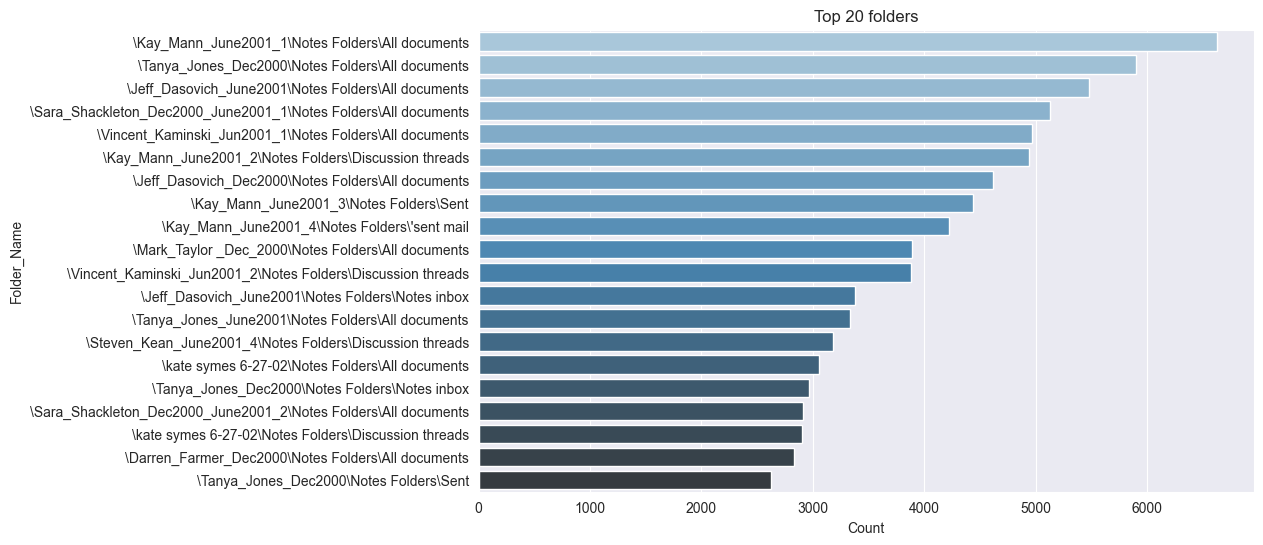

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

#### Visualize Messages sent across the years

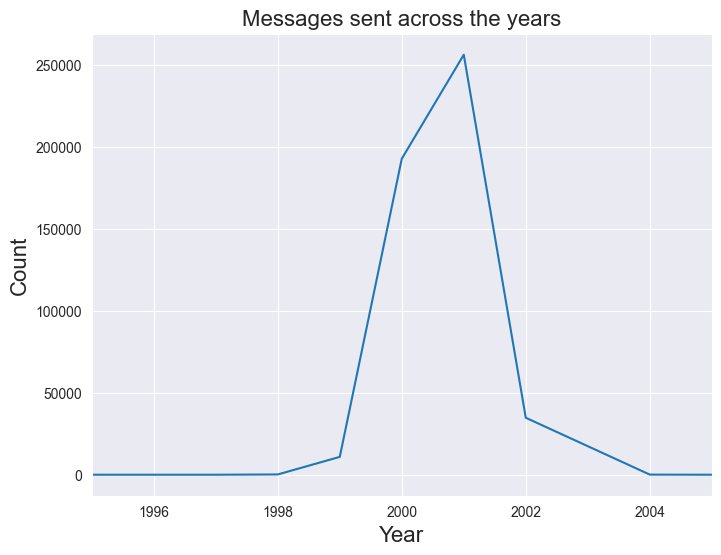

In [76]:
# make a diagram to show the count of messages sent per year
ax = df.groupby(df.Year)['X-Origin'].count().plot(figsize = (8,6))
ax.set_xlim(1995,2005)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Count', fontsize = 16)
ax.set_title('Messages sent across the years', fontsize = 16)
plt.show()

#### Messages Sent Across the Months Based on Year (1995-2005)

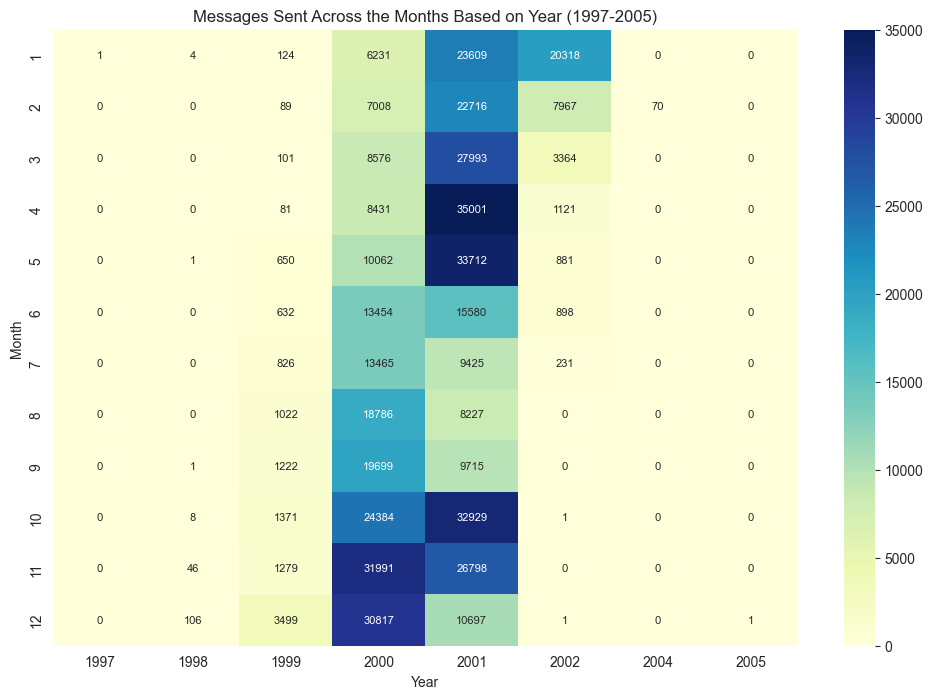

In [77]:
# Group the data by Year and Month and count the number of messages
monthly_counts = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Filter the data for the years 1997 to 2005
monthly_counts_filtered = monthly_counts.loc[1997:2005]

plt.figure(figsize=(12, 8))

# Create the heatmap with annotations for each value
sns.heatmap(monthly_counts_filtered.T, cmap='YlGnBu', annot=True, fmt='d', annot_kws={"size": 8})

plt.title('Messages Sent Across the Months Based on Year (1997-2005)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

#### Visualize Top 30 Senders

C:\Users\AN HONG\AppData\Local\Temp\ipykernel_7084\2357263635.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df['X-Origin'].value_counts().values[:30], y = df['X-Origin'].value_counts().keys()[:30] ,palette = 'rocket', orient = 'h')


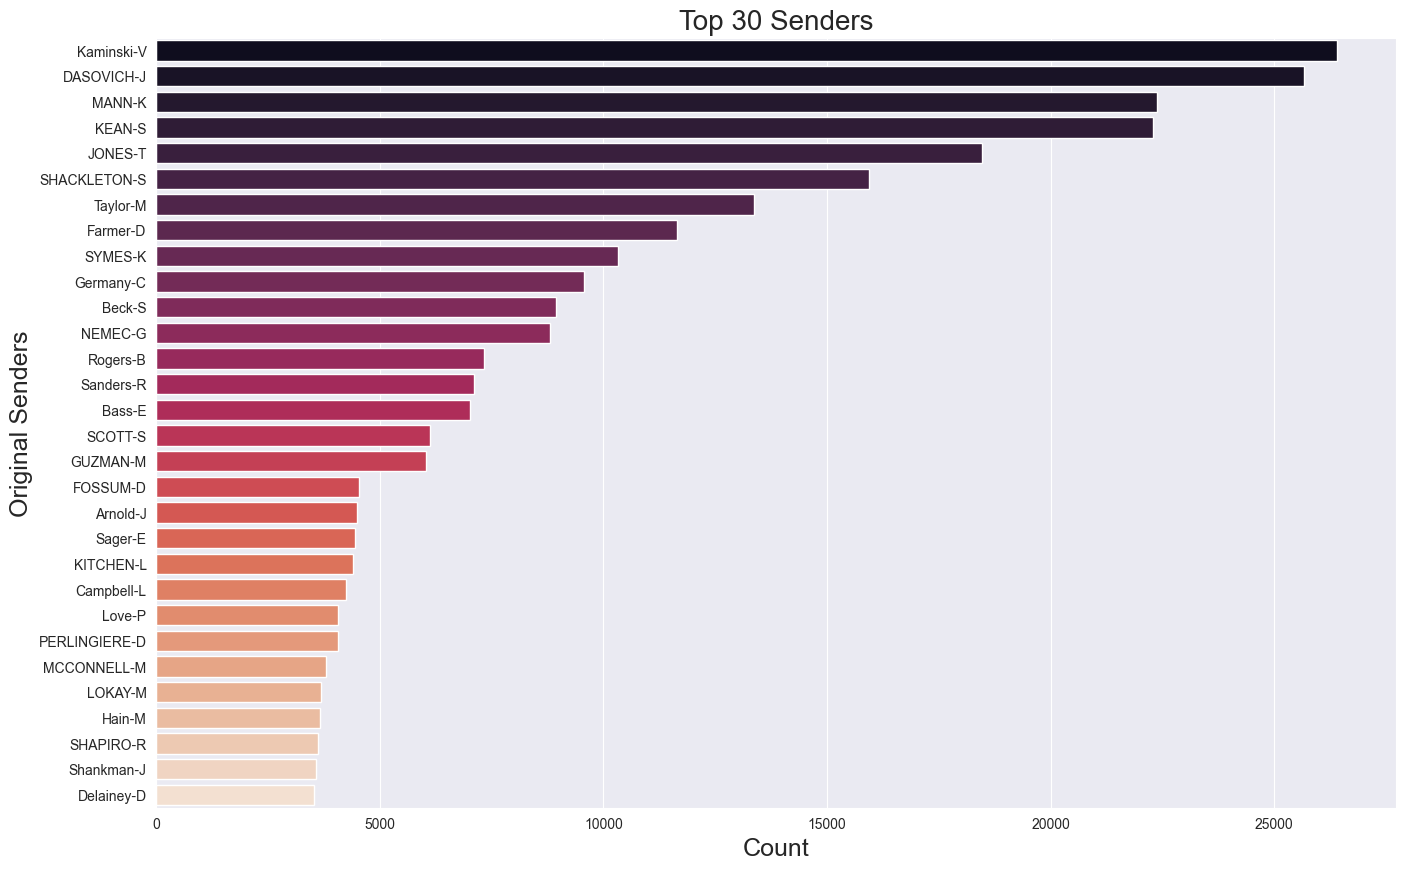

In [78]:
# diagram for showing top senders
plt.figure(figsize = (16,10))
ax = sns.barplot(x = df['X-Origin'].value_counts().values[:30], y = df['X-Origin'].value_counts().keys()[:30] ,palette = 'rocket', orient = 'h')
ax.set_xlabel('Count', fontsize = 18)
ax.set_ylabel('Original Senders', fontsize = 18)
ax.set_title('Top 30 Senders', fontsize = 20)
plt.show()

#### Visualize Top 30 Recepient emails

C:\Users\AN HONG\AppData\Local\Temp\ipykernel_7084\1496489239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df['To'].value_counts().values[:30], y = df['To'].value_counts().keys()[:30] ,palette = 'crest', orient = 'h')


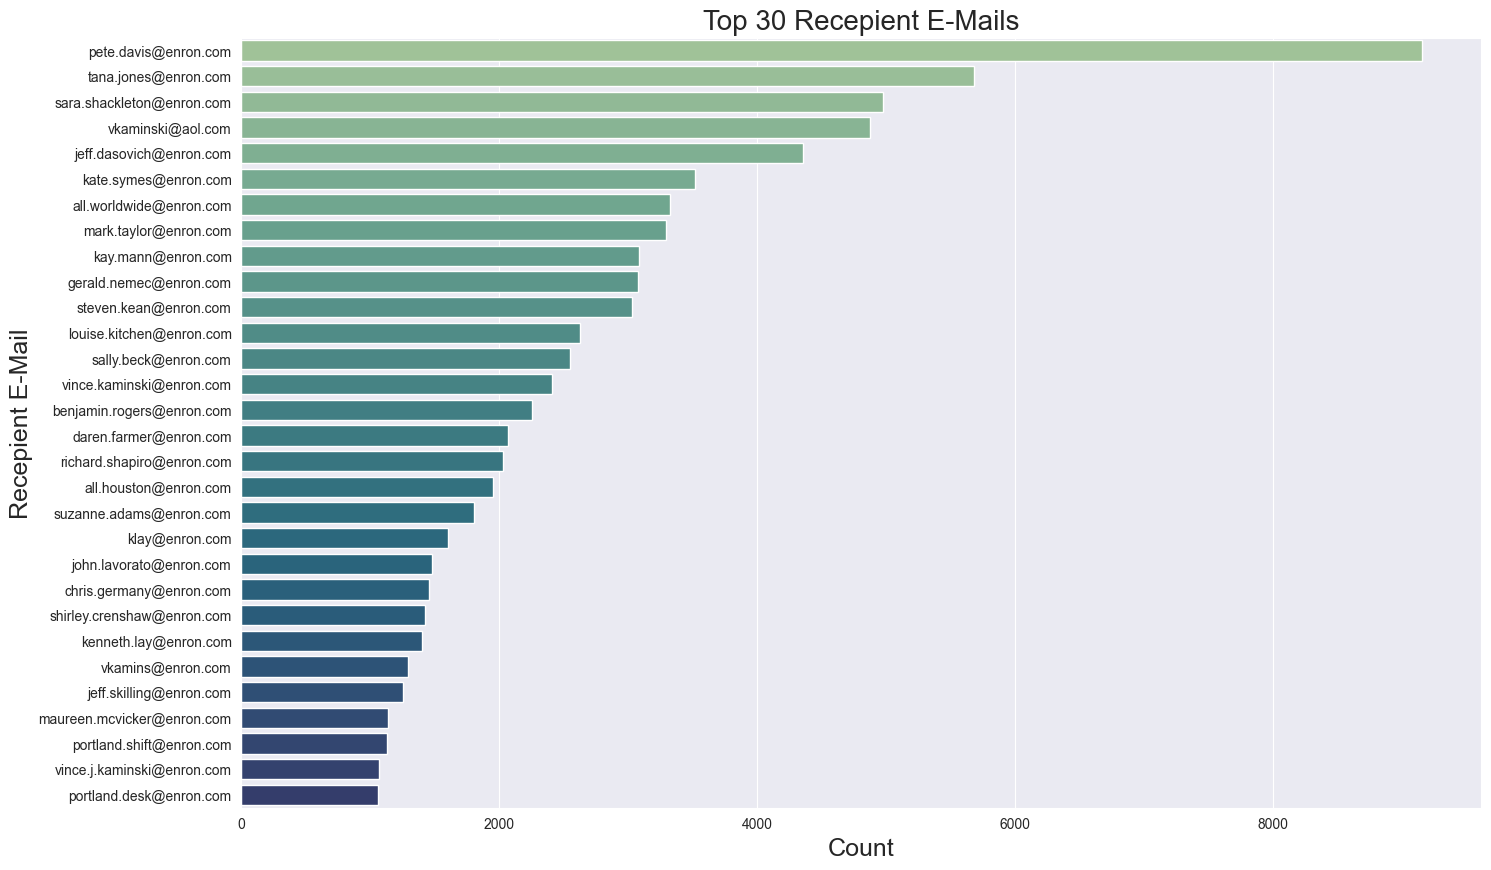

In [79]:
# diagram showing top recepients
plt.figure(figsize = (16,10))
ax = sns.barplot(x = df['To'].value_counts().values[:30], y = df['To'].value_counts().keys()[:30] ,palette = 'crest', orient = 'h')
ax.set_xlabel('Count', fontsize = 18)
ax.set_ylabel('Recepient E-Mail', fontsize = 18)
ax.set_title('Top 30 Recepient E-Mails', fontsize = 20)
plt.show()

#### Top 30 users based on their email count, along with their names and years.

In [80]:
userlist = df['X-Origin'].unique()

In [81]:
# Extract the year column values for each user
useryears = []
for user in userlist:
    year = df.loc[df['X-Origin'] == user, 'Year'].iloc[0]
    useryears.append(year)
    useryears

In [82]:
# Count the number of emails sent by each user
usercount = []
counter = 0
for name in userlist:
    for user in df['X-Origin'].values:
        if user == name:
            counter += 1
    usercount.append(counter)
    counter = 0

The `zip()` function combines elements from the three lists (userlist, usercount, and useryears) into tuples. Each tuple will have three elements: a user name, the count of emails sent, and the corresponding year.

Converts the zip object into a list of tuples. Each tuple in the list represents the user, their count, and the year.

contain a list of the top 30 users based on their email count, along with their names and years.

In [83]:
dataf = sorted(list(zip(userlist, usercount, useryears)), key= lambda user: user[1], reverse = True)[:30]

In [84]:
dataf = pd.DataFrame(dataf)
dataf.columns = ['User', 'Count', 'Year']
dataf.head()

,User,Count,Year
0,Kaminski-V,26409,2000
1,DASOVICH-J,25656,2000
2,MANN-K,22372,2000
3,KEAN-S,22296,2000
4,JONES-T,18475,1999


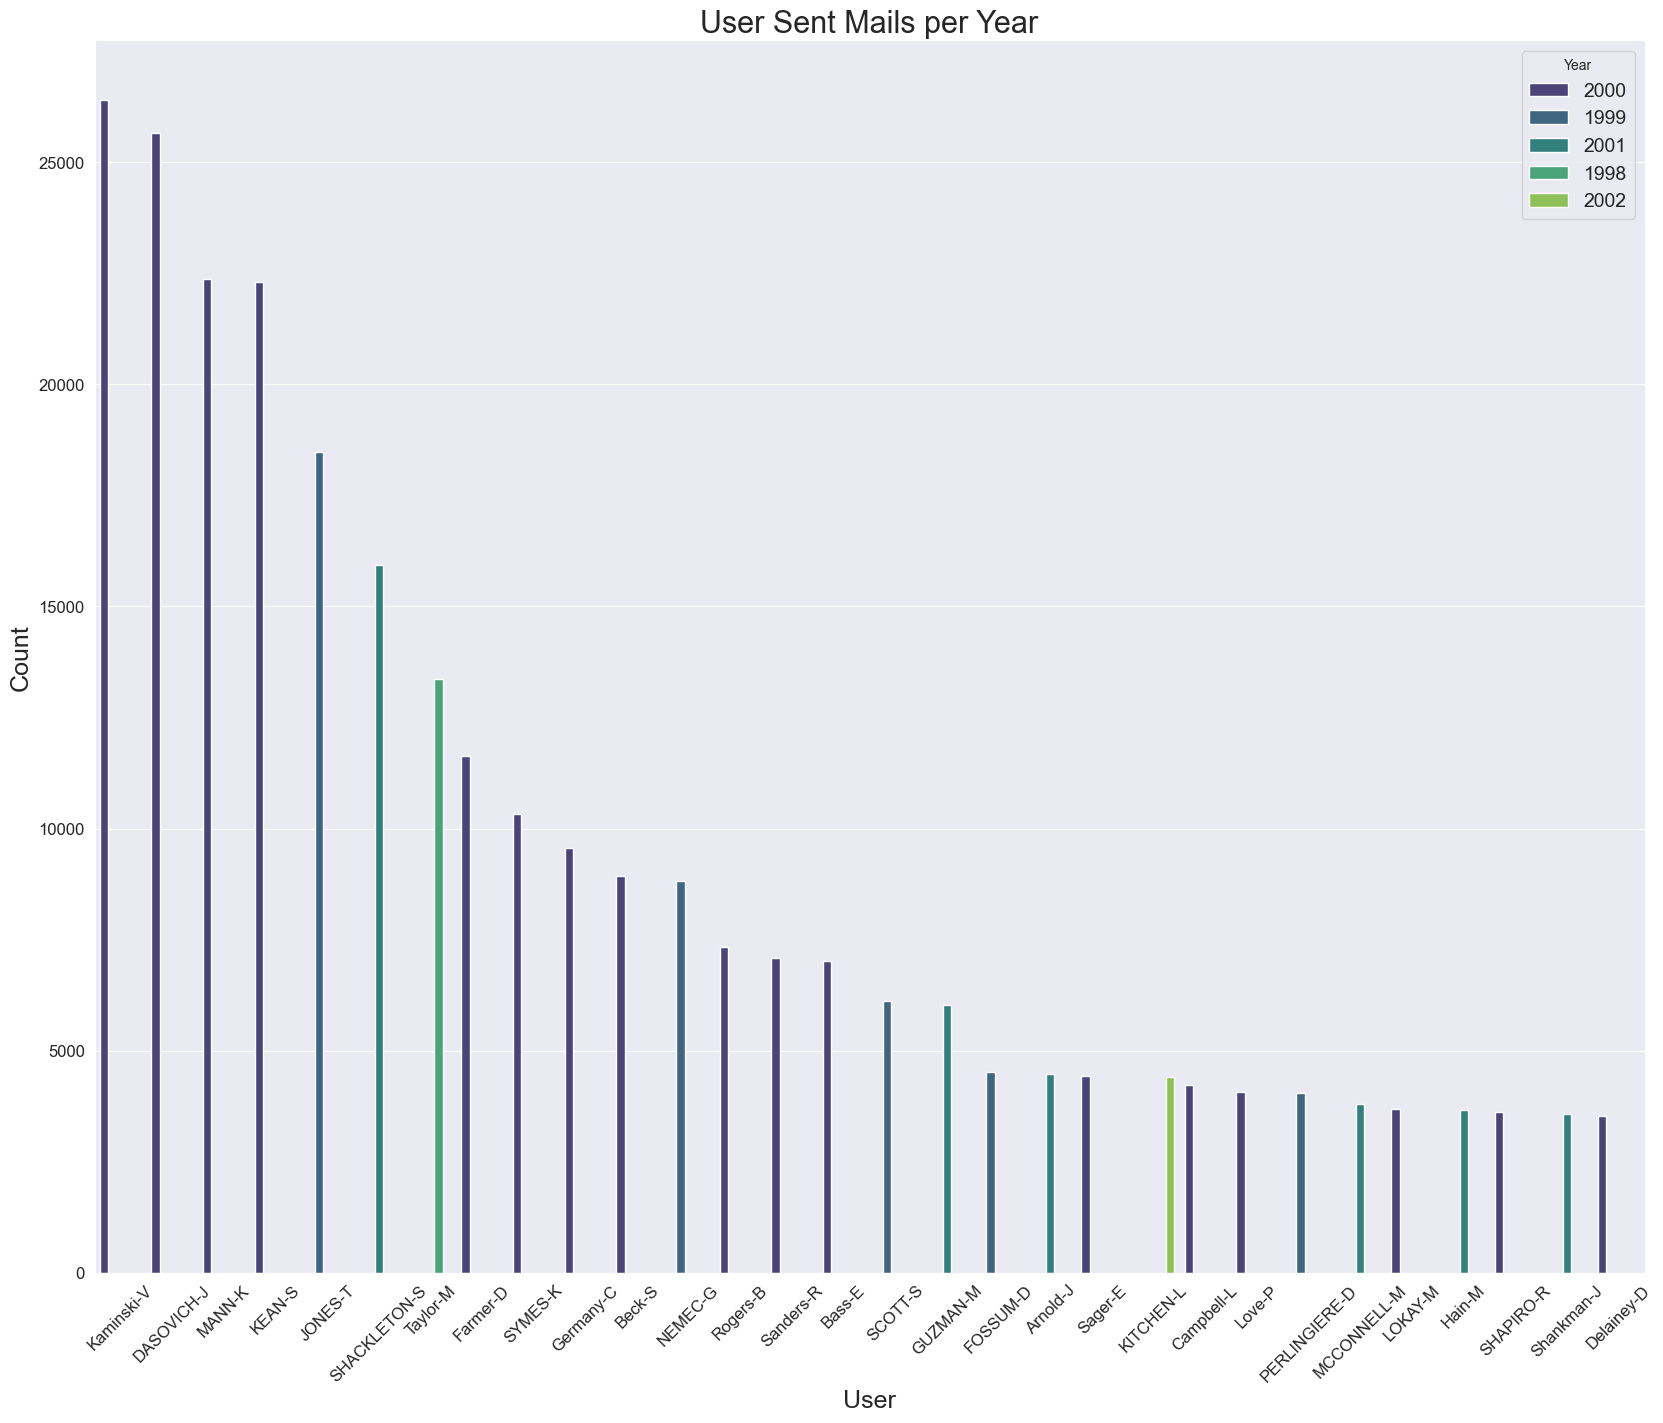

In [85]:
# Convert 'dataf' to a Pandas DataFrame
dataf_df = pd.DataFrame(dataf, columns=['User', 'Count', 'Year'])

# Ensure 'Year' is of type string for the hue parameter
dataf_df['Year'] = dataf_df['Year'].astype(str)

# Plot the barplot using the DataFrame
plt.figure(figsize=(20, 16))
ax = sns.barplot(data=dataf_df, x='User', y='Count', hue='Year', palette='viridis', saturation=0.7, dodge=True)

# Adjust plot aesthetics
sns.despine()
plt.xlabel('User', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('User Sent Mails per Year', fontsize=22)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Year', fontsize=14)
plt.show()

#### Network of Email Communications

The network gives a visual overview of email communication patterns between individuals.

Central nodes: Individuals who have sent or received emails from many others. They may have many connections (edges), indicating high email activity.

Isolated nodes or subgroups: Individuals or small groups that are either not well-connected to the rest of the network or have more communication within a specific cluster.

In [86]:
from plotly import graph_objects as go
import networkx as nx

In [87]:
# Load a subset of the first 400 rows from the dataset
subset_df = df[:400]

# Create a graph from the pandas DataFrame
G = nx.from_pandas_edgelist(subset_df, 'X-Origin', 'X-To')

# Use spring layout for positioning nodes
pos = nx.spring_layout(G, seed=42)

# Extract node positions and degrees
node_x = []
node_y = []
node_text = []
for node, (x, y) in pos.items():
    node_x.append(x)
    node_y.append(y)
    node_text.append(f"{node} - Degree: {G.degree[node]}")

# Extract edge positions
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='salmon'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Blues',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Color nodes based on their degree
node_colors = [G.degree[node] for node in G.nodes()]
node_trace.marker.color = node_colors

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Interactive Network of Emails (First 400 Rows)',
                    titlefont=dict(size=24),
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=40, l=40, r=40, t=40),
                    annotations=[dict(
                        text="Network graph made with Python and Plotly",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    width=1600,  # Increased width for larger plot size
                    height=1600  # Increased height for larger plot size
                ))

# Show the interactive plot
fig.show()
